# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sinasc = pd.read_csv("sinasc_RO_2019.csv")

sinasc['APGAR5'].dtype

dtype('float64')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [23]:
if sinasc['APGAR5'].dtype == float: 
    APGAR5_categorizado = pd.cut(sinasc['APGAR5'], bins=[0, 3, 5, 7, 10], include_lowest=True, labels=['asfixia grave', 
                                                                             'asfixia moderada', 
                                                                             'asfixia leve',
                                                                             'normal' ])


In [24]:
APGAR5_categorizado 

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5, Length: 27028, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

([<matplotlib.axis.YTick at 0x1859123da50>,
 [Text(0, 0, 'zero'),
  Text(0, 2, 'Asfixia_Grave'),
  Text(0, 4, 'Asfixia_Moderada'),
  Text(0, 6, 'Asfixia_Leve'),
  Text(0, 8, 'Normal')])

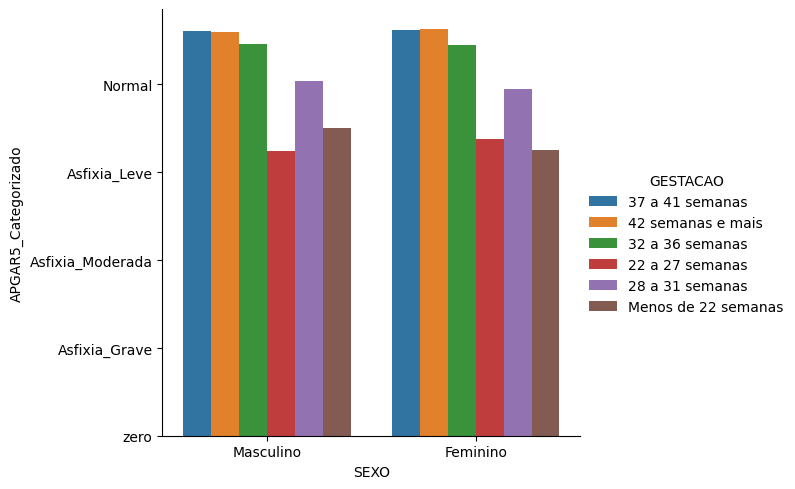

In [25]:
labels=['zero','Asfixia_Grave','Asfixia_Moderada','Asfixia_Leve','Normal']
sns.catplot(x='SEXO',
            y='APGAR5',
            hue='GESTACAO',
            kind='bar',
            errorbar=None,
            data=sinasc
           )
y1 = [0,2,4,6,8]
plt.ylabel('APGAR5_Categorizado')
plt.yticks(y1,labels,rotation=0)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [26]:
# Tabela cruzada
sinasc['APGAR5'] = APGAR5_categorizado
freq = pd.crosstab(sinasc['GESTACAO'],sinasc['APGAR5'])
freq

APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
freq_pctlin = freq.div(freq.sum(axis=1), axis = 0)
freq_pctlin

APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003581,0.008505,0.032677,0.955237
37 a 41 semanas,0.001465,0.001243,0.008702,0.988589
42 semanas e mais,0.001433,0.001433,0.008596,0.988539
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

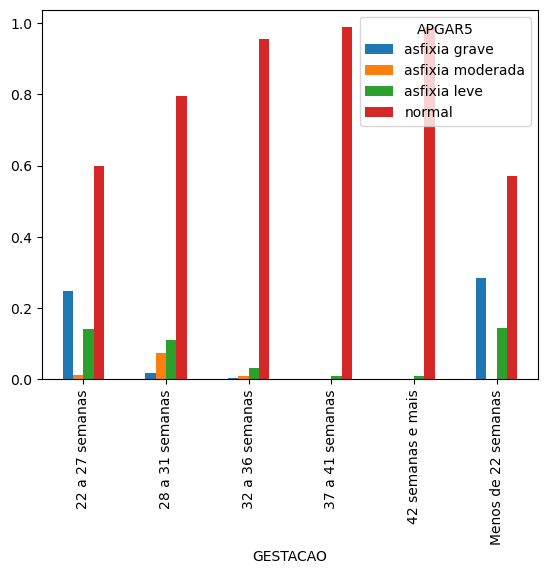

In [28]:
freq_pctlin.plot.bar()

Pelo gráfico, percebemos que em recém nascidos de uma gestação de 37 semanas ou mais os casos de asfixia grave e até mesmo moderada é quase nula a ponto de nem ser perceptível, porém  em gestações com menos de 37 semanas asfixia grave e moderada começam a ser mais comum, então classificar esses casos como prematuro faz bastante sentido. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Vamos começar analisando através do histograma a seguir

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


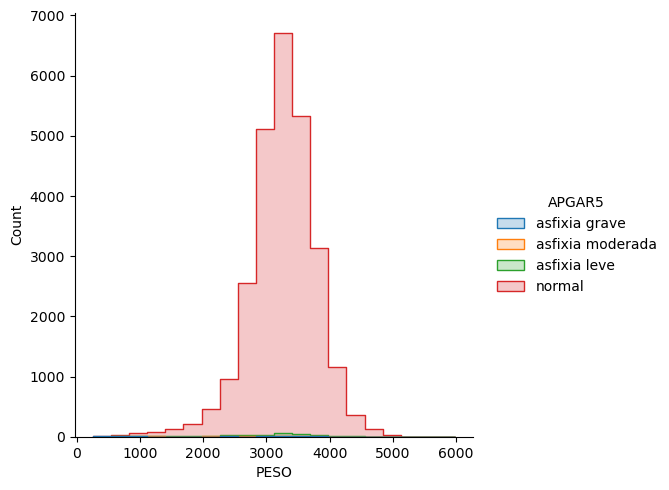

In [29]:
sns.displot(data=sinasc,
            x='PESO', 
            hue ='APGAR5',
            bins=20, 
            element='step')

Pelo Histograma, se observarmos bem, percebemos que quanto menor o peso do bebê, maiores a chance de ter uma asfixia grave, mas isso vale apenas para casos extremos e ainda assim é uma quantidade muito pequena, então talvez não tenha tanta relação assim.
Para confirmar essa hipótese, vamos fazer um gráfico do tipo "point plot":

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


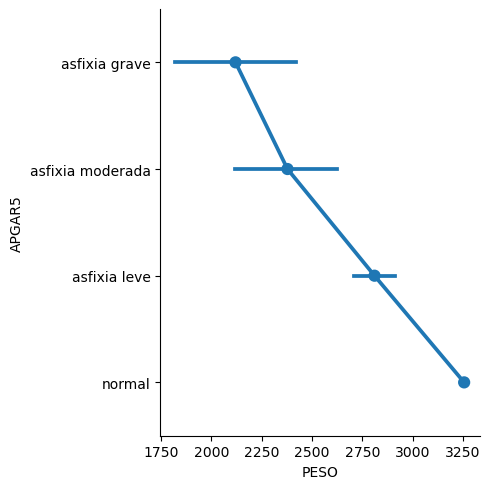

In [162]:
sns.catplot(x='PESO',
            y='APGAR5', 
            kind='point',
            data=sinasc)

Nesse tipo de gráfico conseguimos obeservar as tendências de peso para cada "tipo" de APGAR, pelo histograma observamos que a grande maioria dos bebês tende a ter o Peso entre 2500 e 3500 gramas, no point plot vemos que isso é a tendência.
Conseguimos ver também, como antes, que os bebês que pesam menos tem maiores chances de ter asfixia grave. Porém as barras horizontais nos mostram a "incerteza" disso, pois há uma grande variação do peso, isso pode se dar pela pouca quantidade de amostra de bebês com asfixia grave. Então vamos observar mais um gráfico.

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

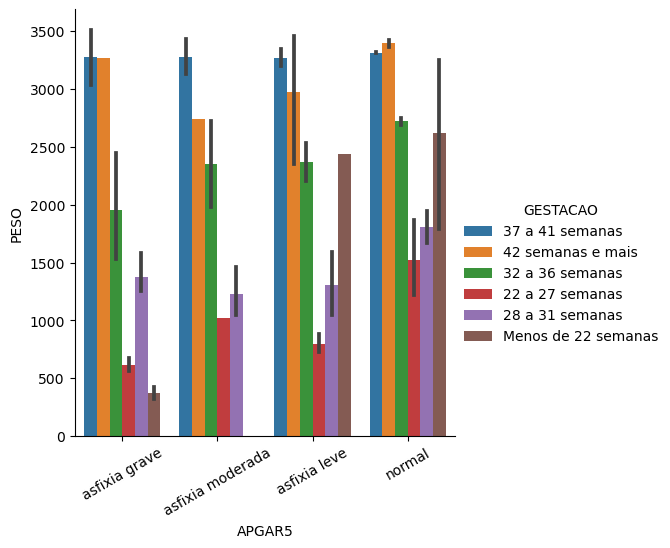

In [170]:
sns.catplot(x='APGAR5',
            y='PESO',
            hue='GESTACAO',
            kind='bar',
            data=sinasc).tick_params(axis='x',rotation=30)

No gráfico de barras acima temos o peso em relação a cada escala do APGAR5 observado pelo tempo de gestação, aqui fica claro que a maior variação de peso ocorre quando a gestação foi num período menor que 22 semanas, ou seja, se o bebê nasceu com um peso mais próximo da tendência (entre 2500 e 3500) ele tem mais chance de ter um apgar na escala normal, só que a asfixia grave tem uma variação de peso muito similar as outras escalas.
Isso nos mostra que não necessariamente o peso está relacionado ao APGAR e sim a gestação, porém o APGAR está relacionado ao peso, pois bebês com peso que seguem a tendência "normal" acabam tendo uma escala de asfixia leve ou normal.